# Benchmarks for `Cheby` on dense matrices (in-place)

In [1]:
using QuantumPropagators: Cheby

In [2]:
import QuantumPropagators
import CSV
import DataFrames
using Plots
using QuantumControl: run_or_load

In [3]:
import PropagationBenchmarks
using PropagationBenchmarks: run_benchmarks, params, Vary
using PropagationBenchmarks: generate_exact_solution
using PropagationBenchmarks: calibrate_cheby
using PropagationBenchmarks: generate_trial_data, generate_timing_data
using PropagationBenchmarks: BenchmarkSeries
using PropagationBenchmarks:
    Units, plot_prec_runtimes, plot_size_runtime, plot_scaling, plot_overhead

In [4]:
using AppleAccelerate #  no-op on non-Apple
PropagationBenchmarks.info()

Julia Version 1.11.1


Commit 8f5b7ca12ad (2024-10-16 10:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 64 × Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, cascadelake)
Threads: 1 default, 0 interactive, 1 GC (on 64 virtual cores)
Environment:
  LD_LIBRARY_PATH = /home/goerz/.local/lib
  JULIA_NUM_THREADS = 1
  JULIA_PKG_PRESERVE_TIERED_INSTALLED = true
  NUMEXPR_NUM_THREADS = 1
  OPENBLAS_NUM_THREADS = 1
  VECLIB_MAXIMUM_THREADS = 1
  OMP_NUM_THREADS = 1
  MKL_NUM_THREADS = 1
BLAS Libraries:
  libopenblas64_.so [ilp64]
Packages:


  QuantumControl         : 0.11.1
  QuantumPropagators     : 0.8.3
  QuantumControlTestUtils: 0.3.1


In [5]:
projectdir(path...) = joinpath(@__DIR__, path...)
datadir(path...) = projectdir("data", "B01_01_Cheby_InPlace_Dense", path...)
mkpath(datadir())

SYSTEMS_CACHE = Dict();
EXACT_SOLUTIONS_CACHE = Dict();
CALIBRATION_CACHE = Dict();

QuantumPropagators.disable_timings();

In [6]:
FORCE = (get(ENV, "FORCE", "0") in ["true", "1"])

false

## Runtime over System Size

In [7]:
SYSTEM_PARAMETERS = params(
    # see arguments of `random_dynamic_generator`
    N = Vary(100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
    spectral_envelope = 1.0,
    exact_spectral_envelope = true,
    number_of_controls = 1,
    density = 1,
    hermitian = true,
    dt = 1.0,
    nt = 1001,
);

In [8]:
BENCHMARK_PARAMETERS = params(method = Cheby, cheby_coeffs_limit = Vary(1e-15, 1e-8));

In [9]:
size_trial_data = run_or_load(datadir("benchmark_size_trials.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_trial_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

[ Info: File data/B01_01_Cheby_InPlace_Dense/benchmark_size_trials.jld2 does not exist. Creating it now.


generate systems:  20%|██████▋                          |  ETA: 0:00:26

generate systems:  40%|█████████████▎                   |  ETA: 0:00:11

generate systems:  50%|████████████████▌                |  ETA: 0:00:08

generate systems:  80%|██████████████████████████▍      |  ETA: 0:00:02

generate systems: 100%|█████████████████████████████████| Time: 0:00:08

calibrate:         10%|███▎                             |  ETA: 0:00:02

calibrate:        100%|█████████████████████████████████| Time: 0:00:00


benchmark:         10%|███▎                             |  ETA: 0:06:29

benchmark:         15%|█████                            |  ETA: 0:05:48

benchmark:         20%|██████▋                          |  ETA: 0:05:19

benchmark:         25%|████████▎                        |  ETA: 0:06:33

benchmark:         30%|█████████▉                       |  ETA: 0:06:31

benchmark:         35%|███████████▌                     |  ETA: 0:06:23

benchmark:         40%|█████████████▎                   |  ETA: 0:05:42

benchmark:         45%|██████████████▉                  |  ETA: 0:05:01

benchmark:         50%|████████████████▌                |  ETA: 0:04:37

benchmark:         55%|██████████████████▏              |  ETA: 0:04:07

benchmark:         60%|███████████████████▊             |  ETA: 0:03:33

benchmark:         65%|█████████████████████▌           |  ETA: 0:03:02

benchmark:         70%|███████████████████████▏         |  ETA: 0:02:33

benchmark:         75%|████████████████████████▊        |  ETA: 0:02:08

benchmark:         80%|██████████████████████████▍      |  ETA: 0:01:43

benchmark:         85%|████████████████████████████     |  ETA: 0:01:16

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:00:51

benchmark:         95%|███████████████████████████████▍ |  ETA: 0:00:25

benchmark:        100%|█████████████████████████████████| Time: 0:08:42

In [10]:
QuantumPropagators.enable_timings();

size_timing_data = run_or_load(datadir("benchmark_size_timing.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: File data/B01_01_Cheby_InPlace_Dense/benchmark_size_timing.jld2 does not exist. Creating it now.


benchmark:         10%|███▎                             |  ETA: 0:03:21

benchmark:         15%|█████                            |  ETA: 0:03:15

benchmark:         20%|██████▋                          |  ETA: 0:02:19

benchmark:         25%|████████▎                        |  ETA: 0:02:12

benchmark:         30%|█████████▉                       |  ETA: 0:01:56

benchmark:         35%|███████████▌                     |  ETA: 0:01:34

benchmark:         40%|█████████████▎                   |  ETA: 0:01:36

benchmark:         45%|██████████████▉                  |  ETA: 0:01:20

benchmark:         50%|████████████████▌                |  ETA: 0:01:07

benchmark:         55%|██████████████████▏              |  ETA: 0:00:59

benchmark:         60%|███████████████████▊             |  ETA: 0:01:02

benchmark:         65%|█████████████████████▌           |  ETA: 0:00:50

benchmark:         70%|███████████████████████▏         |  ETA: 0:00:50

benchmark:         75%|████████████████████████▊        |  ETA: 0:00:49

benchmark:         80%|██████████████████████████▍      |  ETA: 0:00:43

benchmark:         85%|████████████████████████████     |  ETA: 0:00:33

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:00:25

benchmark:         95%|███████████████████████████████▍ |  ETA: 0:00:12

benchmark:        100%|█████████████████████████████████| Time: 0:03:53

In [11]:
size_runtime_data = merge(size_trial_data, size_timing_data)

Row,N,cheby_coeffs_limit,init_prop,propagate,timesteps,matrix_vector_products,percent
1,100,1.0e-15,Trial(1.144 ms),Trial(82.543 ms),1000,15000,86.8771
2,100,1.0e-8,Trial(1.162 ms),Trial(57.263 ms),1000,10000,83.6482
3,200,1.0e-15,Trial(1.730 ms),Trial(234.301 ms),1000,15000,93.1662
4,200,1.0e-8,Trial(1.756 ms),Trial(159.425 ms),1000,10000,92.0998
5,300,1.0e-15,Trial(4.528 ms),Trial(982.696 ms),1000,15000,97.1197
6,300,1.0e-8,Trial(4.524 ms),Trial(661.675 ms),1000,10000,96.4805
7,400,1.0e-15,Trial(10.019 ms),Trial(2.675 s),1000,15000,98.7847
8,400,1.0e-8,Trial(10.028 ms),Trial(1.789 s),1000,10000,98.5082
9,500,1.0e-15,Trial(16.302 ms),Trial(4.555 s),1000,15000,99.1347
10,500,1.0e-8,Trial(16.460 ms),Trial(3.067 s),1000,10000,98.9444


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_size_high.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_size_low.csv


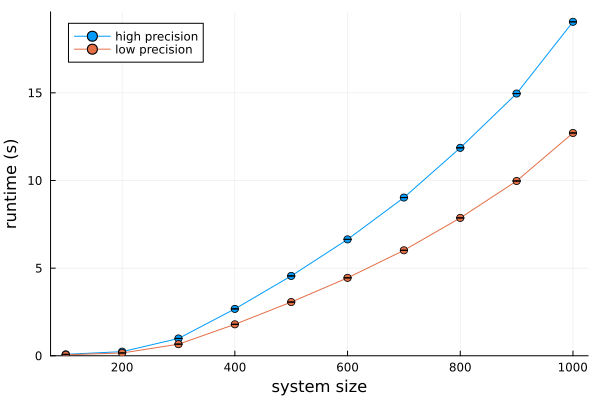

In [12]:
plot_size_runtime(
    size_runtime_data;
    label = "{key} precision",
    csv = datadir("cheby_inplace_dense_runtime_size_{key}.csv")
) do row
    if row[:cheby_coeffs_limit] == 1e-15
        return :high
    elseif row[:cheby_coeffs_limit] == 1e-8
        return :low
    else
        error("Unexpected `cheby_coeffs_limit`")
    end
end

## Runtime over Precision

In [13]:
PRECISION = Vary(1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-15);

In [14]:
SYSTEM_PARAMETERS = params(
    # see arguments of `random_dynamic_generator`
    N = Vary(1_000, 100, 10),
    spectral_envelope = 1.0,
    exact_spectral_envelope = true,
    number_of_controls = 1,
    density = 1,
    hermitian = true,
    dt = 1.0,
    nt = 1001,
);

In [15]:
EXACT_SOLUTION_PARAMETERS = params(method = Cheby, cheby_coeffs_limit = 1e-15,);

In [16]:
BENCHMARK_PARAMETERS = params(method = Cheby, precision = PRECISION,);

In [17]:
prec_trial_data = run_or_load(datadir("benchmark_prec_trials.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        generate_exact_solution = generate_exact_solution,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_trial_data,
        calibrate = calibrate_cheby,  # translate `precision` into `cheby_coeffs_limit`
        calibrated_keys_to_store = [:cheby_coeffs_limit],
        systems_cache = SYSTEMS_CACHE,
        calibration_cache = CALIBRATION_CACHE,
        exact_solutions_cache = EXACT_SOLUTIONS_CACHE,
    )
end;

[ Info: File data/B01_01_Cheby_InPlace_Dense/benchmark_prec_trials.jld2 does not exist. Creating it now.


exact solutions:   67%|██████████████████████           |  ETA: 0:00:11

exact solutions:  100%|█████████████████████████████████| Time: 0:00:22


calibrate:          7%|██▎                              |  ETA: 0:11:31

calibrate:         10%|███▎                             |  ETA: 0:25:15

calibrate:         13%|████▍                            |  ETA: 0:21:14

calibrate:         23%|███████▊                         |  ETA: 0:10:46

calibrate:         30%|█████████▉                       |  ETA: 0:09:33

calibrate:         43%|██████████████▎                  |  ETA: 0:05:21

calibrate:         47%|███████████████▍                 |  ETA: 0:05:51

calibrate:         53%|█████████████████▋               |  ETA: 0:04:29

calibrate:         57%|██████████████████▊              |  ETA: 0:03:55

calibrate:         60%|███████████████████▊             |  ETA: 0:03:25

calibrate:         63%|████████████████████▉            |  ETA: 0:02:58

calibrate:         67%|██████████████████████           |  ETA: 0:03:25

calibrate:         70%|███████████████████████▏         |  ETA: 0:02:56

calibrate:         73%|████████████████████████▎        |  ETA: 0:02:43

calibrate:         77%|█████████████████████████▎       |  ETA: 0:02:43

calibrate:         80%|██████████████████████████▍      |  ETA: 0:02:14

calibrate:         87%|████████████████████████████▋    |  ETA: 0:01:22

calibrate:         90%|█████████████████████████████▊   |  ETA: 0:01:00

calibrate:         93%|██████████████████████████████▊  |  ETA: 0:00:38

calibrate:         97%|███████████████████████████████▉ |  ETA: 0:00:22

calibrate:        100%|█████████████████████████████████| Time: 0:10:39


benchmark:          7%|██▎                              |  ETA: 0:17:05

benchmark:         10%|███▎                             |  ETA: 0:17:23

benchmark:         13%|████▍                            |  ETA: 0:14:01

benchmark:         17%|█████▌                           |  ETA: 0:11:55

benchmark:         20%|██████▋                          |  ETA: 0:10:43

benchmark:         23%|███████▊                         |  ETA: 0:09:46

benchmark:         27%|████████▊                        |  ETA: 0:10:15

benchmark:         30%|█████████▉                       |  ETA: 0:10:05

benchmark:         33%|███████████                      |  ETA: 0:09:13

benchmark:         37%|████████████▏                    |  ETA: 0:08:28

benchmark:         40%|█████████████▎                   |  ETA: 0:08:29

benchmark:         43%|██████████████▎                  |  ETA: 0:07:42

benchmark:         47%|███████████████▍                 |  ETA: 0:06:59

benchmark:         50%|████████████████▌                |  ETA: 0:06:20

benchmark:         53%|█████████████████▋               |  ETA: 0:06:08

benchmark:         57%|██████████████████▊              |  ETA: 0:05:54

benchmark:         60%|███████████████████▊             |  ETA: 0:05:21

benchmark:         63%|████████████████████▉            |  ETA: 0:04:56

benchmark:         67%|██████████████████████           |  ETA: 0:04:25

benchmark:         70%|███████████████████████▏         |  ETA: 0:03:53

benchmark:         73%|████████████████████████▎        |  ETA: 0:03:22

benchmark:         77%|█████████████████████████▎       |  ETA: 0:02:53

benchmark:         80%|██████████████████████████▍      |  ETA: 0:02:31

benchmark:         83%|███████████████████████████▌     |  ETA: 0:02:04

benchmark:         87%|████████████████████████████▋    |  ETA: 0:01:38

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:01:12

benchmark:         93%|██████████████████████████████▊  |  ETA: 0:00:48

benchmark:         97%|███████████████████████████████▉ |  ETA: 0:00:24

benchmark:        100%|█████████████████████████████████| Time: 0:11:40

In [18]:
QuantumPropagators.enable_timings();

prec_timing_data = run_or_load(datadir("benchmark_prec_timings.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        generate_exact_solution = generate_exact_solution,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_timing_data,
        calibrate = calibrate_cheby,
        calibrated_keys_to_store = [:cheby_coeffs_limit],
        systems_cache = SYSTEMS_CACHE,
        calibration_cache = CALIBRATION_CACHE,
        exact_solutions_cache = EXACT_SOLUTIONS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: File data/B01_01_Cheby_InPlace_Dense/benchmark_prec_timings.jld2 does not exist. Creating it now.


benchmark:          7%|██▎                              |  ETA: 0:00:10

benchmark:         10%|███▎                             |  ETA: 0:00:08

benchmark:         13%|████▍                            |  ETA: 0:02:31

benchmark:         17%|█████▌                           |  ETA: 0:04:13

benchmark:         20%|██████▋                          |  ETA: 0:05:32

benchmark:         23%|███████▊                         |  ETA: 0:05:39

benchmark:         27%|████████▊                        |  ETA: 0:05:31

benchmark:         43%|██████████████▎                  |  ETA: 0:03:56

benchmark:         47%|███████████████▍                 |  ETA: 0:03:26

benchmark:         50%|████████████████▌                |  ETA: 0:03:00

benchmark:         63%|████████████████████▉            |  ETA: 0:01:45

benchmark:         70%|███████████████████████▏         |  ETA: 0:01:18

benchmark:         73%|████████████████████████▎        |  ETA: 0:01:18

benchmark:         90%|█████████████████████████████▊   |  ETA: 0:00:26

benchmark:         93%|██████████████████████████████▊  |  ETA: 0:00:19

benchmark:         97%|███████████████████████████████▉ |  ETA: 0:00:09

benchmark:        100%|█████████████████████████████████| Time: 0:04:21

In [19]:
prec_runtime_data = merge(prec_trial_data, prec_timing_data)

Row,N,precision,cheby_coeffs_limit,init_prop,propagate,timesteps,matrix_vector_products,percent
1,1000,0.0001,1.0e-5,Trial(63.353 ms),Trial(8.677 s),1000,7000,99.399
2,1000,1.0e-5,1.0e-6,Trial(63.366 ms),Trial(9.921 s),1000,8000,99.4246
3,1000,1.0e-6,1.0e-7,Trial(63.454 ms),Trial(11.170 s),1000,9000,99.4548
4,1000,1.0e-7,1.0e-7,Trial(63.473 ms),Trial(11.152 s),1000,9000,99.4244
5,1000,1.0e-8,1.0e-8,Trial(63.595 ms),Trial(12.398 s),1000,10000,99.4762
6,1000,1.0e-9,1.0e-10,Trial(63.632 ms),Trial(13.620 s),1000,11000,99.4939
7,1000,1.0e-10,1.0e-11,Trial(63.452 ms),Trial(14.856 s),1000,12000,99.5236
8,1000,1.0e-11,1.0e-11,Trial(63.405 ms),Trial(14.881 s),1000,12000,99.5147
9,1000,1.0e-12,1.0e-12,Trial(63.413 ms),Trial(16.128 s),1000,13000,99.5191
10,1000,1.0e-15,missing,Trial(63.406 ms),Trial(16.105 s),1000,13000,99.5118


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_N=1000.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_N=100.csv


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_N=10.csv


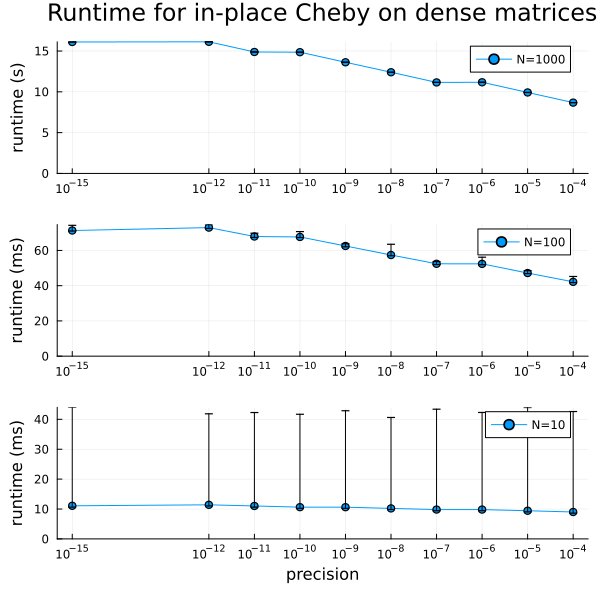

In [20]:
plot_prec_runtimes(
    prec_runtime_data,
    [1000, 100, 10];
    units = Dict(1000 => :s, 100 => :ms, 10 => :ms),
    size = (600, 600),
    plot_title = "Runtime for in-place Cheby on dense matrices",
    csv = datadir("cheby_inplace_dense_runtime_N={N}.csv"),
)

## Scaling with Spectral Envelope

For larger system sizes, the runtime of the propagation should be dominated by matrix-vector products. The number of matrix_vector products should depend only on the desired precision and the spectral envelope of the system (for `dt=1.0`; or alternatively, on `dt` if the spectral envelope is kept constant). We analyze here how the number of matrix-vector products scales with the spectral envelope for the default "high" precision (machine precision), and for lower precision (roughly half machine precision).

This scaling should be mostly independent of the size or the encoding of the system.

In [21]:
QuantumPropagators.enable_timings();

scaling_data = run_or_load(datadir("benchmark_scaling.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = params(
            N = 100,
            spectral_envelope = Vary(0.5, 1.0, 5.0, 10.0, 15.0, 20.0, 25.0),
            exact_spectral_envelope = true,
            number_of_controls = 1,
            density = 1,
            hermitian = true,
            dt = 1.0,
            nt = 1001,
        ),
        benchmark_parameters = params(
            method = Cheby,
            cheby_coeffs_limit = Vary(1e-15, 1e-8)
        ),
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: File data/B01_01_Cheby_InPlace_Dense/benchmark_scaling.jld2 does not exist. Creating it now.


benchmark:         14%|████▊                            |  ETA: 0:00:07

benchmark:         21%|███████▏                         |  ETA: 0:00:05

benchmark:         29%|█████████▍                       |  ETA: 0:00:05

benchmark:         36%|███████████▊                     |  ETA: 0:00:04

benchmark:         43%|██████████████▏                  |  ETA: 0:00:03

benchmark:         50%|████████████████▌                |  ETA: 0:00:03

benchmark:         64%|█████████████████████▎           |  ETA: 0:00:02

benchmark:         71%|███████████████████████▋         |  ETA: 0:00:01

benchmark:         79%|█████████████████████████▉       |  ETA: 0:00:01

benchmark:         86%|████████████████████████████▎    |  ETA: 0:00:01

benchmark:         93%|██████████████████████████████▋  |  ETA: 0:00:00

benchmark:        100%|█████████████████████████████████| Time: 0:00:05

In [22]:
scaling_data

Row,spectral_envelope,cheby_coeffs_limit,timesteps,matrix_vector_products,percent
1,0.5,1.0e-15,1000,12000,85.963
2,0.5,1.0e-8,1000,8000,82.5929
3,1.0,1.0e-15,1000,15000,87.4221
4,1.0,1.0e-8,1000,10000,84.6668
5,5.0,1.0e-15,1000,26000,90.5839
6,5.0,1.0e-8,1000,18000,88.7186
7,10.0,1.0e-15,1000,36000,91.5995
8,10.0,1.0e-8,1000,27000,90.5054
9,15.0,1.0e-15,1000,43000,91.9069
10,15.0,1.0e-8,1000,33000,91.1191


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_scaling_high.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_scaling_low.csv


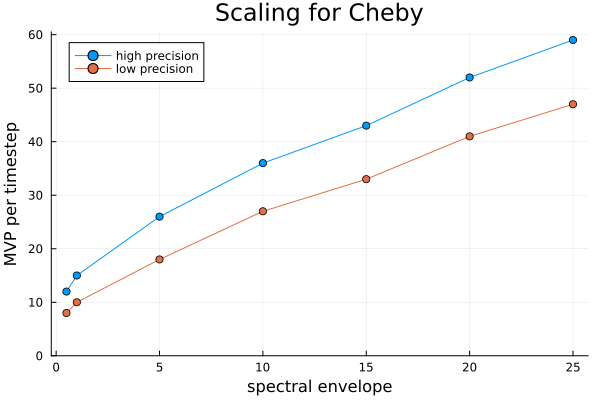

In [23]:
plot_scaling(
    scaling_data;
    plot_title = "Scaling for Cheby",
    csv = datadir("cheby_scaling_{key}.csv")
) do row
    if row[:cheby_coeffs_limit] == 1e-15
        return :high
    elseif row[:cheby_coeffs_limit] == 1e-8
        return :low
    else
        error("Unexpected `cheby_coeffs_limit`")
    end
end

## Overhead with System Size

For sufficiently large systems, the propagation should be dominated by matrix-vector products. Here, we analyze the "overhead", i.e., the percentage of the runtime _not_ spent in matrix-vector products, for smaller systems.

In [24]:
QuantumPropagators.enable_timings();

overhead_data = run_or_load(datadir("benchmark_overhead.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = params(
            N = Vary(5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
            spectral_envelope = 1.0,
            exact_spectral_envelope = true,
            number_of_controls = 1,
            density = 1,
            hermitian = true,
            dt = 1.0,
            nt = 1001,
        ),
        benchmark_parameters = params(method = Cheby),
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end

QuantumPropagators.disable_timings();

[ Info: File data/B01_01_Cheby_InPlace_Dense/benchmark_overhead.jld2 does not exist. Creating it now.


benchmark:         15%|█████▏                           |  ETA: 0:00:28

benchmark:         23%|███████▋                         |  ETA: 0:01:26

benchmark:         31%|██████████▏                      |  ETA: 0:01:33

benchmark:         38%|████████████▊                    |  ETA: 0:01:06

benchmark:         69%|██████████████████████▉          |  ETA: 0:00:35

benchmark:         77%|█████████████████████████▍       |  ETA: 0:00:26

benchmark:        100%|█████████████████████████████████| Time: 0:02:00

In [25]:
overhead_data

Row,N,timesteps,matrix_vector_products,percent
1,5,1000,12000,34.7895
2,10,1000,12000,38.8805
3,50,1000,13000,71.7381
4,100,1000,13000,86.3513
5,200,1000,13000,93.1899
6,300,1000,13000,97.012
7,400,1000,13000,98.7039
8,500,1000,13000,99.0704
9,600,1000,13000,99.2447
10,700,1000,13000,99.3819


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B01_01_Cheby_InPlace_Dense/cheby_inplace_dense_overhead.csv


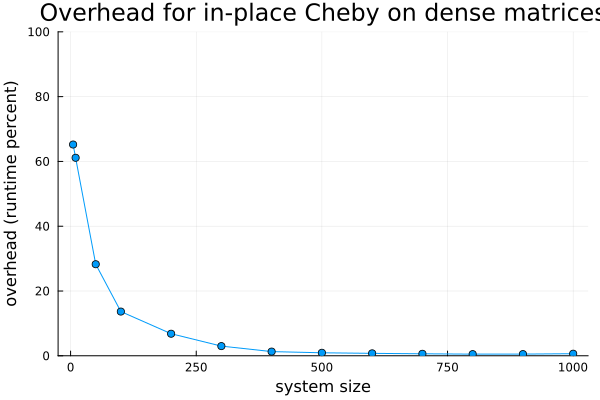

In [26]:
plot_overhead(
    overhead_data;
    csv = datadir("cheby_inplace_dense_overhead.csv"),
    plot_title = "Overhead for in-place Cheby on dense matrices",
)